# Support Vector Machines (SVM) 
### Support Vector Machines (SVM) is a supervised learning algorithm that constructs an optimal hyperplane to separate data points into distinct classes, excelling in both binary and multi-class classification tasks. By leveraging kernel functions (e.g., linear, polynomial, or radial basis function), SVM can handle non-linear relationships, making it highly effective for predicting wine quality categories based on physicochemical properties like alcohol and acidity. The algorithm assumes that data is separable (with a kernel if necessary) and benefits from a clear margin between classes, though it does not require strict distributional assumptions. Its strength lies in its ability to manage high-dimensional data and provide robust generalization with a small number of support vectors, but it can be computationally intensive, especially with large datasets, and sensitive to the choice of kernel and hyperparameters (e.g., C and gamma).

### Use SVM as a baseline for classification with tuning of the kernel and regularization parameters to optimize performance, particularly for deployment in precision-driven applications.

| Aspect | Details |
| :- | :- |
| Use For           | Classification (e.g., wine quality prediction, image recognition)<br>Can be extended to regression with SVR |
| Key Assumptions   | - Data is separable (with a kernel if non-linear)<br>- Independent observations<br>- Clear margin between classes for optimal performance |
| Advantages        | - Effective in high-dimensional spaces<br>- Robust with a small number of support vectors<br>- Flexible with various kernel functions |
| Disadvantages     | - Computationally intensive for large datasets<br>- Sensitive to hyperparameter choices (C, gamma)<br>- Struggles with overlapping classes |
| Avoid When        | - Large datasets requiring low latency<br>- Highly overlapping or noisy data<br>- Need for highly interpretable models |
| Real-World Use Case | Wine quality prediction (e.g., classifying quality based on chemical properties)<br>Image classification (e.g., identifying objects in medical images) |

## Problem Description: 
### Predict the quality of red wine (rated from 0 to 10) based on physicochemical properties like alcohol content, pH, and volatile acidity. 

Using Kaggle dataset https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

## Modified Approach to improve accuracy:
- feature engineering adding new features
- tune Hyperparameters - C (regularization) and gamma (kernel coefficient)
- balance classes - apply class weights to handle imbalance
- kernels - test linear or poly kernels alongside rbf to see if a different kernel fits better

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [11]:
project_dir = './06_support_vector_machine'

# load  dataset
data = pd.read_csv(project_dir + '/data/winequality-red.csv')
print("Dataset loaded, shape:", data.shape)

# feature engineering: add total acidity - to increase accuracy
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity'] + data['citric acid']

# select relevant features and target 
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 
            'total_acidity']
X = data[features]
y = data['quality']  
print("Features shape:", X.shape, "Target shape:", y.shape)

# scale features to improve model performance.
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

Dataset loaded, shape: (1599, 12)
Features shape: (1599, 12) Target shape: (1599,)


In [12]:
# split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set shape:", X_train.shape, "Test set shape:", X_test.shape)

Train set shape: (1279, 12) Test set shape: (320, 12)


In [13]:
# train the SVM model with hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],  # regularization parameter - use wider range
    'gamma': ['scale', 'auto', 0.1, 0.01],  # kernel coefficient
    'kernel': ['rbf', 'linear'],  # test different kernels
    'class_weight': [None, 'balanced']  # handle class imbalance
}
svm_model = SVC(decision_function_shape='ovr', random_state=4)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 10.0, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}


In [14]:
# predict and evaluate the model
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.62
Confusion Matrix:
[[  0   0   1   1   0   0]
 [  0   0   8   3   0   0]
 [  1   3 106  36   0   0]
 [  0   0  36  70  12   0]
 [  0   0   2  16  23   0]
 [  0   0   0   1   1   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.73      0.71       146
           6       0.55      0.59      0.57       118
           7       0.64      0.56      0.60        41
           8       0.00      0.00      0.00         2

    accuracy                           0.62       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.60      0.62      0.61       320



/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

In [15]:
# visualize feature importance (approximated with coefficients for linear kernel if selected)
if grid_search.best_params_['kernel'] == 'linear':
    feature_importance = pd.DataFrame({'feature': features, 'importance': np.abs(best_svm.coef_[0]) if len(best_svm.coef_.shape) > 1 else np.abs(best_svm.coef_)})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance in SVM (Linear Kernel)')
    plt.show()
else:
    print("Feature importance visualization not available for non-linear kernels (e.g., RBF).")

Feature importance visualization not available for non-linear kernels (e.g., RBF).


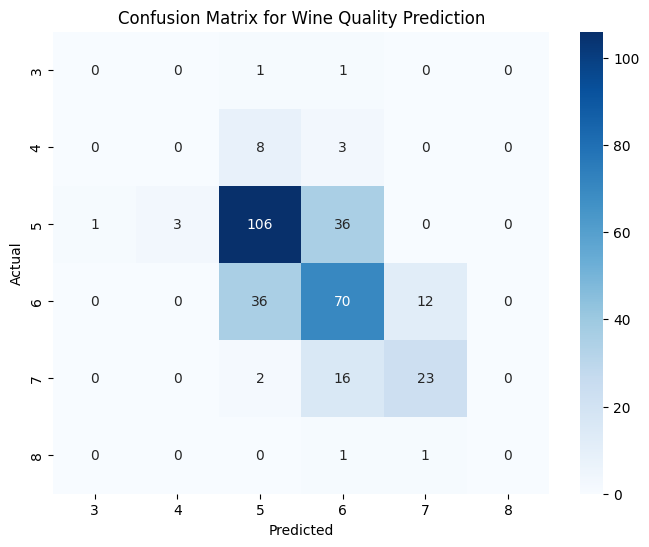

In [16]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.show()

In [17]:
# save the trained model2 to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
model_filename = os.path.join(model_dir, 'wine_quality_svm_model.pkl')
joblib.dump(best_svm, model_filename)
print(f'Model saved as {model_filename}')

Model saved as ./06_support_vector_machine/model/wine_quality_svm_model.pkl


In [18]:
# load the model and run a prediction test 
loaded_model = joblib.load(model_filename)

sample_data = pd.DataFrame(
    [[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 8.1]],
    columns=features
)
sample_input_scaled = scaler.transform(sample_data)
sample_prediction = loaded_model.predict(sample_input_scaled)
print(f'Predicted Wine Quality for sample input: {sample_prediction[0]}')

Predicted Wine Quality for sample input: 5


/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
